In [3]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import plotly.express as px
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
text = '''According to the Oxford English Dictionary (third edition 2009), the name "India" is derived from the Classical Latin India, a reference to South Asia and an uncertain region to its east. In turn the name "India" derived successively from Hellenistic Greek India ( Ἰνδία), ancient Greek Indos ( Ἰνδός), Old Persian Hindush (an eastern province of the Achaemenid Empire), and ultimately its cognate, the Sanskrit Sindhu, or "river," specifically the Indus River and, by implication, its well-settled southern basin.[73][74] The ancient Greeks referred to the Indians as Indoi (Ἰνδοί), which translates as "The people of the Indus".[75]

The term Bharat (Bhārat; pronounced [ˈbʱaːɾət] (listen)), mentioned in both Indian epic poetry and the Constitution of India,[76][77] is used in its variations by many Indian languages. A modern rendering of the historical name Bharatavarsha, which applied originally to North India,[78][79] Bharat gained increased currency from the mid-19th century as a native name for India.[76][80]

Hindustan ([ɦɪndʊˈstaːn] (listen)) is a Middle Persian name for India that became popular by the 13th century,[81] and was used widely since the era of Mughal Empire. The meaning of Hindustan has varied, referring to a region encompassing present-day northern India and Pakistan or to India in its near entirety.'''

In [6]:
text

'According to the Oxford English Dictionary (third edition 2009), the name "India" is derived from the Classical Latin India, a reference to South Asia and an uncertain region to its east. In turn the name "India" derived successively from Hellenistic Greek India ( Ἰνδία), ancient Greek Indos ( Ἰνδός), Old Persian Hindush (an eastern province of the Achaemenid Empire), and ultimately its cognate, the Sanskrit Sindhu, or "river," specifically the Indus River and, by implication, its well-settled southern basin.[73][74] The ancient Greeks referred to the Indians as Indoi (Ἰνδοί), which translates as "The people of the Indus".[75]\n\nThe term Bharat (Bhārat; pronounced [ˈbʱaːɾət] (listen)), mentioned in both Indian epic poetry and the Constitution of India,[76][77] is used in its variations by many Indian languages. A modern rendering of the historical name Bharatavarsha, which applied originally to North India,[78][79] Bharat gained increased currency from the mid-19th century as a nativ

In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
stem = PorterStemmer()
lemm = WordNetLemmatizer()

In [12]:
stemcorpus = []

for i in range(len(text[0])):
    review = re.sub('[^a-zA-Z]',' ',text)
    review = review.lower()
    review = review.split()
    review = [stem.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    stemcorpus.append(review)

In [14]:
text

'According to the Oxford English Dictionary (third edition 2009), the name "India" is derived from the Classical Latin India, a reference to South Asia and an uncertain region to its east. In turn the name "India" derived successively from Hellenistic Greek India ( Ἰνδία), ancient Greek Indos ( Ἰνδός), Old Persian Hindush (an eastern province of the Achaemenid Empire), and ultimately its cognate, the Sanskrit Sindhu, or "river," specifically the Indus River and, by implication, its well-settled southern basin.[73][74] The ancient Greeks referred to the Indians as Indoi (Ἰνδοί), which translates as "The people of the Indus".[75]\n\nThe term Bharat (Bhārat; pronounced [ˈbʱaːɾət] (listen)), mentioned in both Indian epic poetry and the Constitution of India,[76][77] is used in its variations by many Indian languages. A modern rendering of the historical name Bharatavarsha, which applied originally to North India,[78][79] Bharat gained increased currency from the mid-19th century as a nativ

In [15]:
stemcorpus

['accord oxford english dictionari third edit name india deriv classic latin india refer south asia uncertain region east turn name india deriv success hellenist greek india ancient greek indo old persian hindush eastern provinc achaemenid empir ultim cognat sanskrit sindhu river specif indu river implic well settl southern basin ancient greek refer indian indoi translat peopl indu term bharat bh rat pronounc b listen mention indian epic poetri constitut india use variat mani indian languag modern render histor name bharatavarsha appli origin north india bharat gain increas currenc mid th centuri nativ name india hindustan nd sta n listen middl persian name india becam popular th centuri use wide sinc era mughal empir mean hindustan vari refer region encompass present day northern india pakistan india near entireti']

In [16]:
lemmcorpus = []

for i in range(len(text[0])):
    review = re.sub('[^a-zA-Z]',' ',text)
    review = review.lower()
    review = review.split()
    review = [lemm.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    lemmcorpus.append(review)

In [17]:
lemmcorpus

['according oxford english dictionary third edition name india derived classical latin india reference south asia uncertain region east turn name india derived successively hellenistic greek india ancient greek indos old persian hindush eastern province achaemenid empire ultimately cognate sanskrit sindhu river specifically indus river implication well settled southern basin ancient greek referred indian indoi translates people indus term bharat bh rat pronounced b listen mentioned indian epic poetry constitution india used variation many indian language modern rendering historical name bharatavarsha applied originally north india bharat gained increased currency mid th century native name india hindustan nd sta n listen middle persian name india became popular th century used widely since era mughal empire meaning hindustan varied referring region encompassing present day northern india pakistan india near entirety']

In [18]:
stemcorpus

['accord oxford english dictionari third edit name india deriv classic latin india refer south asia uncertain region east turn name india deriv success hellenist greek india ancient greek indo old persian hindush eastern provinc achaemenid empir ultim cognat sanskrit sindhu river specif indu river implic well settl southern basin ancient greek refer indian indoi translat peopl indu term bharat bh rat pronounc b listen mention indian epic poetri constitut india use variat mani indian languag modern render histor name bharatavarsha appli origin north india bharat gain increas currenc mid th centuri nativ name india hindustan nd sta n listen middl persian name india becam popular th centuri use wide sinc era mughal empir mean hindustan vari refer region encompass present day northern india pakistan india near entireti']

In [29]:
tfvector = TfidfVectorizer()
bowvector = CountVectorizer()

In [28]:
x = tfvector.fit_transform(stemcorpus).toarray()
x

array([[0.05986843, 0.05986843, 0.11973687, 0.05986843, 0.05986843,
        0.05986843, 0.05986843, 0.05986843, 0.11973687, 0.05986843,
        0.11973687, 0.05986843, 0.05986843, 0.05986843, 0.05986843,
        0.05986843, 0.11973687, 0.05986843, 0.05986843, 0.05986843,
        0.05986843, 0.11973687, 0.05986843, 0.05986843, 0.05986843,
        0.05986843, 0.05986843, 0.05986843, 0.1796053 , 0.05986843,
        0.05986843, 0.11973687, 0.05986843, 0.05986843, 0.05986843,
        0.59868434, 0.1796053 , 0.05986843, 0.05986843, 0.11973687,
        0.05986843, 0.05986843, 0.11973687, 0.05986843, 0.05986843,
        0.05986843, 0.05986843, 0.05986843, 0.05986843, 0.05986843,
        0.29934217, 0.05986843, 0.05986843, 0.05986843, 0.05986843,
        0.05986843, 0.05986843, 0.05986843, 0.05986843, 0.05986843,
        0.05986843, 0.11973687, 0.05986843, 0.05986843, 0.05986843,
        0.05986843, 0.05986843, 0.05986843, 0.1796053 , 0.11973687,
        0.05986843, 0.11973687, 0.05986843, 0.05

In [32]:
y = bowvector.fit_transform(stemcorpus).toarray()
y

array([[ 1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,
         2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  3,  1,  1,  2,
         1,  1,  1, 10,  3,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,
         1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
         1,  1,  1,  1,  3,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1]], dtype=int64)

In [34]:
x1 = tfvector.fit_transform(lemmcorpus).toarray()
x1

array([[0.06052275, 0.06052275, 0.12104551, 0.06052275, 0.06052275,
        0.06052275, 0.06052275, 0.06052275, 0.12104551, 0.06052275,
        0.12104551, 0.06052275, 0.06052275, 0.06052275, 0.06052275,
        0.06052275, 0.12104551, 0.06052275, 0.06052275, 0.06052275,
        0.06052275, 0.12104551, 0.06052275, 0.06052275, 0.06052275,
        0.06052275, 0.06052275, 0.06052275, 0.18156826, 0.06052275,
        0.06052275, 0.12104551, 0.06052275, 0.06052275, 0.06052275,
        0.60522753, 0.18156826, 0.06052275, 0.06052275, 0.12104551,
        0.06052275, 0.06052275, 0.12104551, 0.06052275, 0.06052275,
        0.06052275, 0.06052275, 0.06052275, 0.06052275, 0.06052275,
        0.30261377, 0.06052275, 0.06052275, 0.06052275, 0.06052275,
        0.06052275, 0.06052275, 0.06052275, 0.06052275, 0.06052275,
        0.06052275, 0.12104551, 0.06052275, 0.06052275, 0.06052275,
        0.06052275, 0.06052275, 0.06052275, 0.06052275, 0.06052275,
        0.06052275, 0.12104551, 0.06052275, 0.12

In [35]:
y1 = bowvector.fit_transform(lemmcorpus).toarray()
y1

array([[ 1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,
         2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  3,  1,  1,  2,
         1,  1,  1, 10,  3,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,
         1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1]],
      dtype=int64)

In [54]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 153.3/153.3 kB 917.0 kB/s eta 0:00:00



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


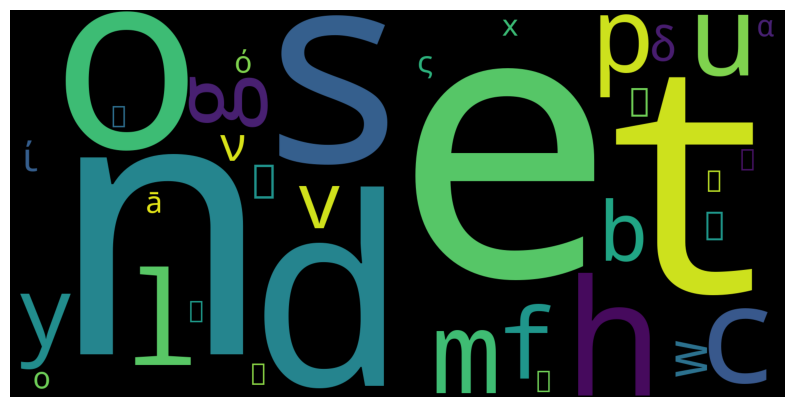

In [63]:
from wordcloud import WordCloud
data = text
plt.figure(figsize = (10,6))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

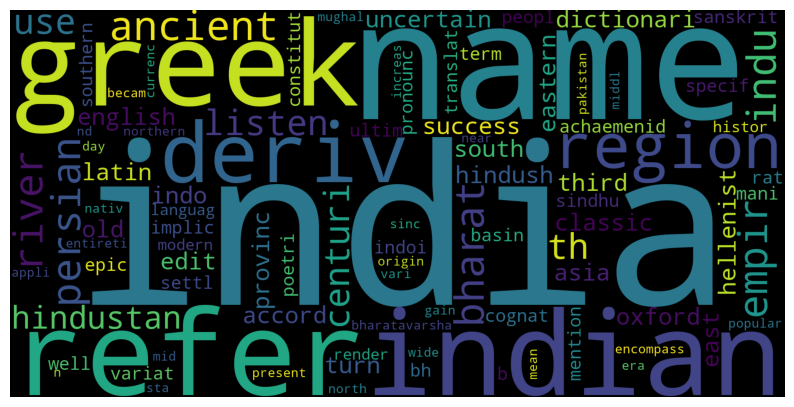

In [65]:
data = stemcorpus
plt.figure(figsize = (10,6))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

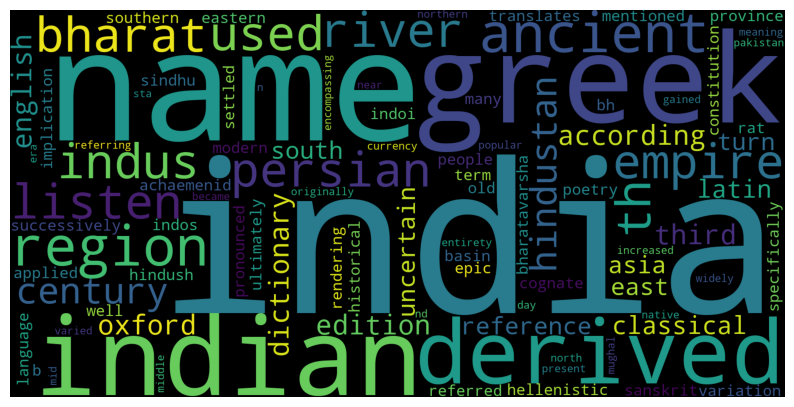

In [67]:
data = lemmcorpus
plt.figure(figsize = (10,6))
wc = WordCloud(max_words = 100, width = 1600 , height = 800).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()